<a href="https://colab.research.google.com/github/wisnua97/SQL-training/blob/main/New_ML_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
loan = pd.read_csv("loan_data.csv")
loan.head()

Saving loan_data.csv to loan_data (1).csv
User uploaded file "loan_data.csv" with length 14401 bytes


,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [ ]:
loan.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

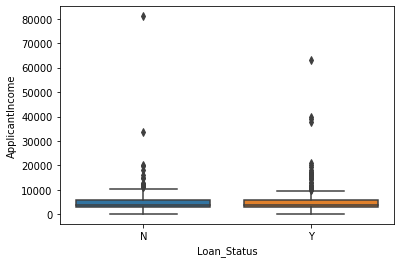

In [ ]:
ax = sns.boxplot(data = loan, x = 'Loan_Status', y = 'ApplicantIncome')

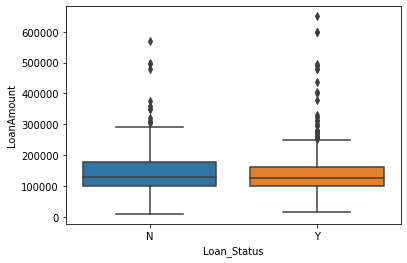

In [ ]:
ax = sns.boxplot(data = loan, x = 'Loan_Status', y = 'LoanAmount')

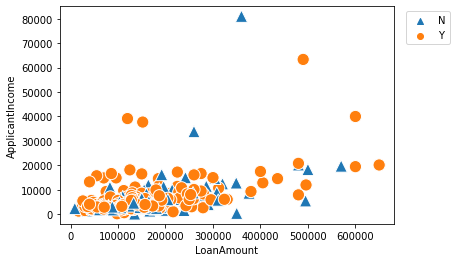

In [ ]:
ax = sns.scatterplot(data = loan, 
                     x = 'LoanAmount', 
                     y = 'ApplicantIncome', 
                     hue = 'Loan_Status', 
                     style = 'Loan_Status', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

In [ ]:
y = loan [['Loan_Status']]

In [ ]:
X = loan[['ApplicantIncome','LoanAmount']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [ ]:
X_train.shape, X_test.shape

((461, 2), (116, 2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [ ]:
model = classifier.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

0.5948275862068966

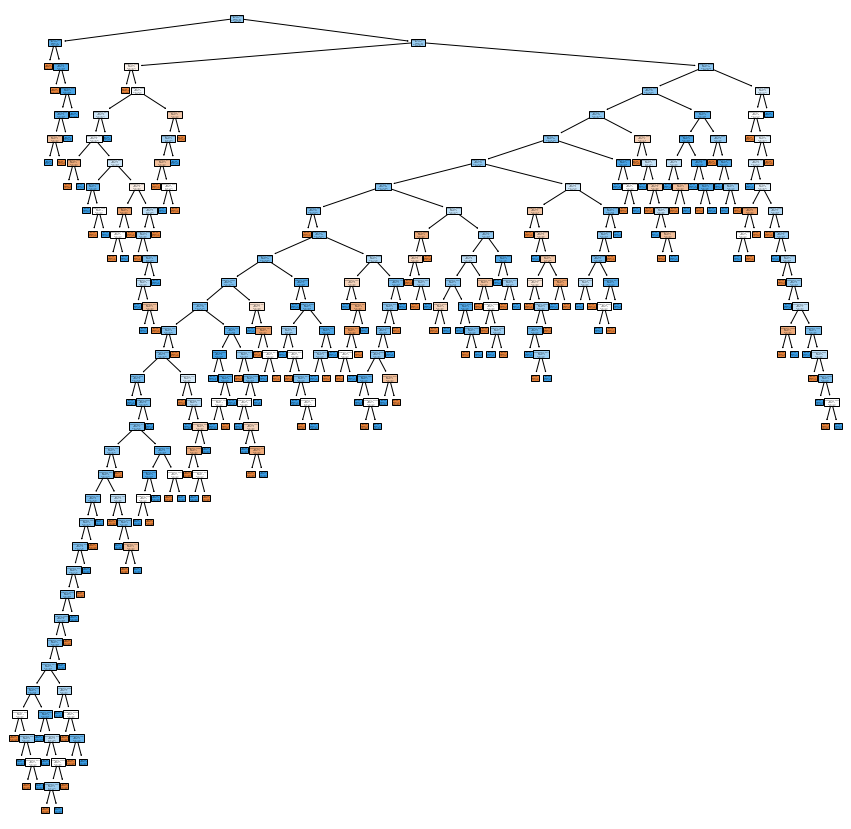

In [ ]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
                      feature_names = list(X.columns),
                      class_names = ['No', 'Yes'],
                      filled = True);

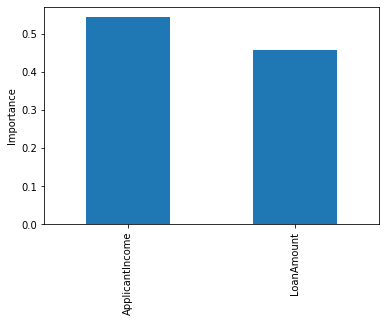

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.5948275862068966

In [ ]:
grid = {'max_depth':[2, 3, 4, 5],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf':[1, 2, 3, 4, 5, 6]}

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 5]})

In [ ]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=1234)

In [ ]:
model_.score(X_train, y_train)

0.7071583514099783

In [ ]:
model_.score(X_test, y_test)

0.6896551724137931

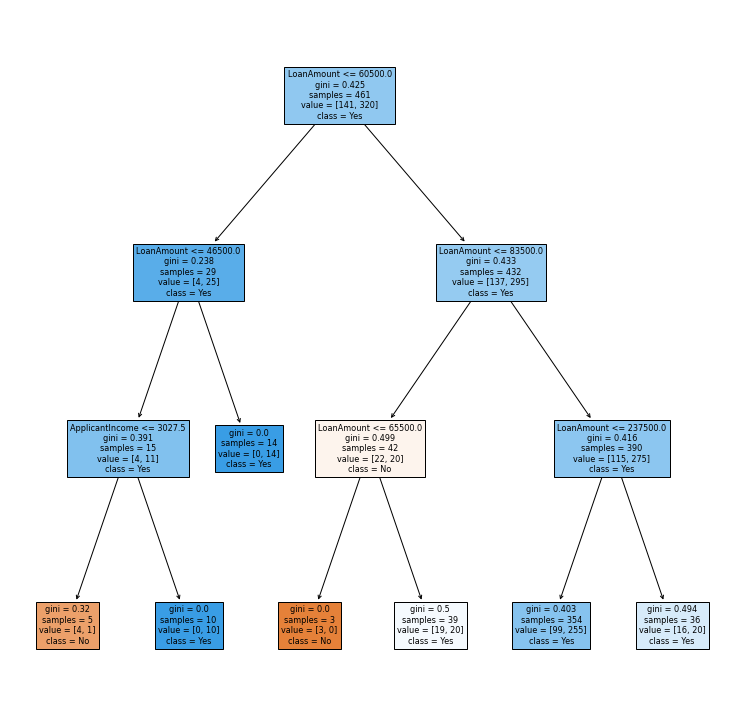

In [ ]:
plt.figure(figsize = (13,13))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);